In [ ]:
%matplotlib inline
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import sys
import os
from __future__ import division
plt.rcParams["figure.figsize"] = (20,10)
from itertools import chain
import tqdm as tqdm
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
import pandas as pd

insur_data = pd.read_csv('/content/insurance.csv')
print(insur_data.shape)
insur_data.head(10)

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [ ]:
insur_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insur_data= insur_data.dropna()
insur_data= insur_data.drop_duplicates()
insur_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
insur_data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insur_data.isnull()
insur_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
insur_data.dropna(thresh=0.8*len(insur_data),axis=1,inplace=True)
insur_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

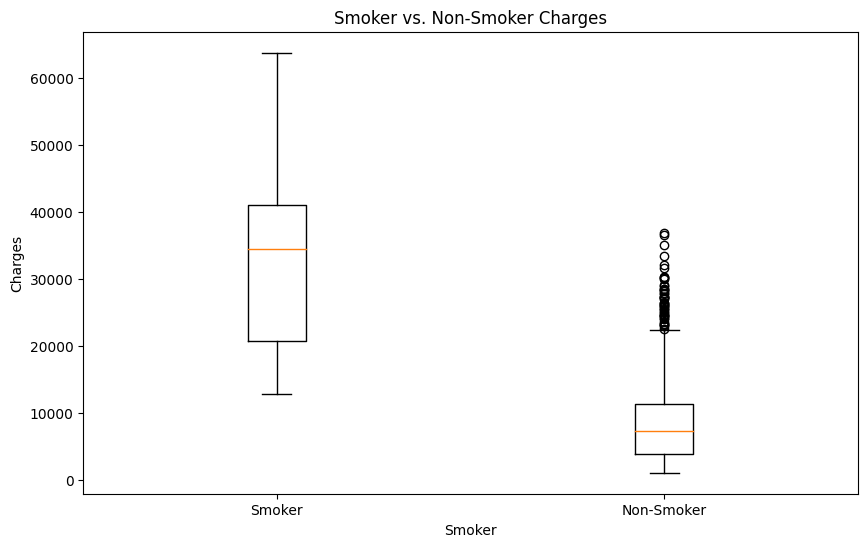

In [ ]:
numeric_columns = insur_data.select_dtypes(include='number').columns   # Fill missing values with the mean of each numeric column
insur_data[numeric_columns] = insur_data[numeric_columns].fillna(insur_data[numeric_columns].mean())
smoker_charges = insur_data.loc[insur_data['smoker'] == 'yes', 'charges']   # Separate charges for smokers and non-smokers
non_smoker_charges = insur_data.loc[insur_data['smoker'] == 'no', 'charges']
plt.figure(figsize=(10, 6))              # Create box plot for smoker vs. non-smoker charges
plt.boxplot([smoker_charges, non_smoker_charges], labels=['Smoker', 'Non-Smoker'])
plt.title('Smoker vs. Non-Smoker Charges')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

<Axes: xlabel='age', ylabel='charges'>

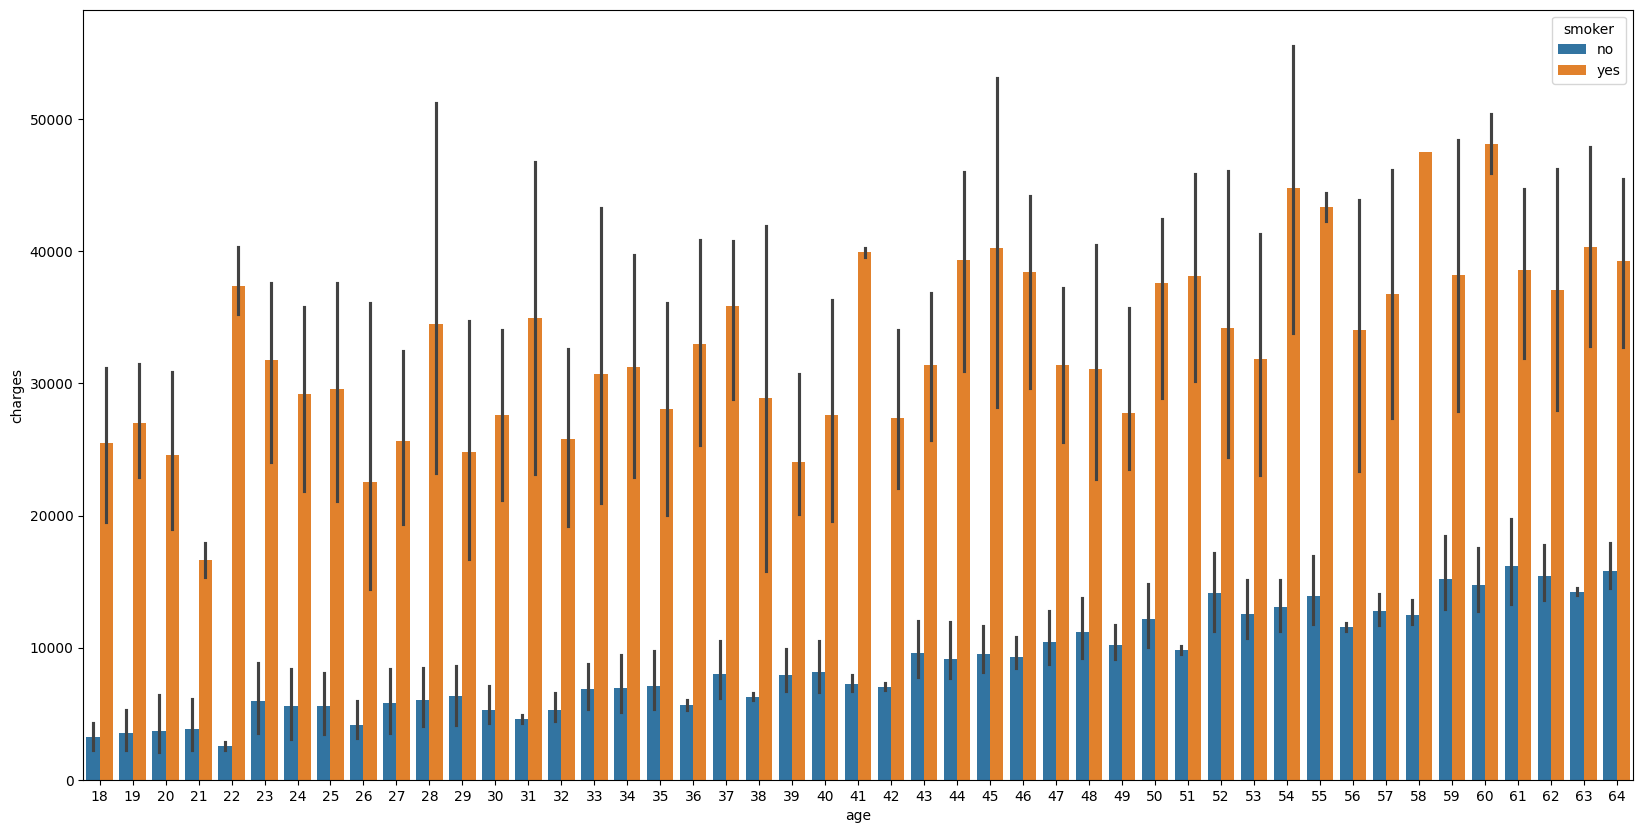

In [ ]:
# @title Charges by Age and Smoker Status

sns.barplot(data=insur_data, x="age", y="charges", hue="smoker")

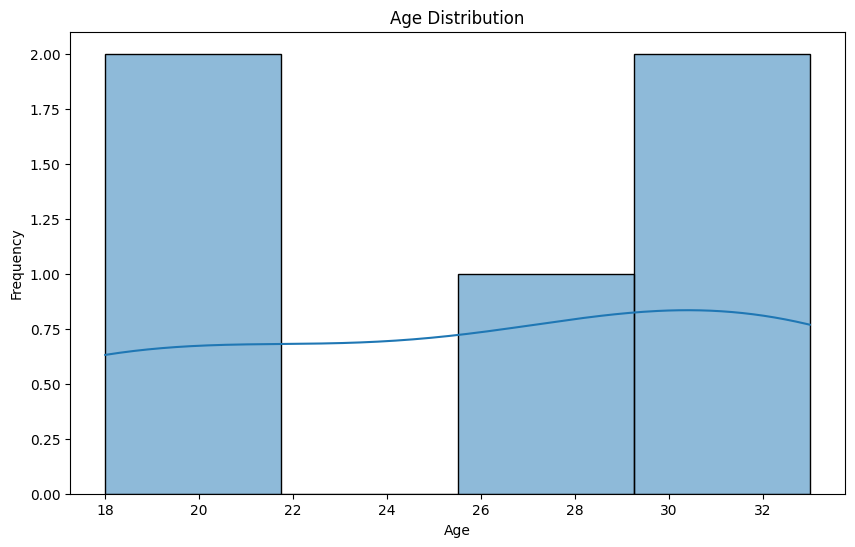

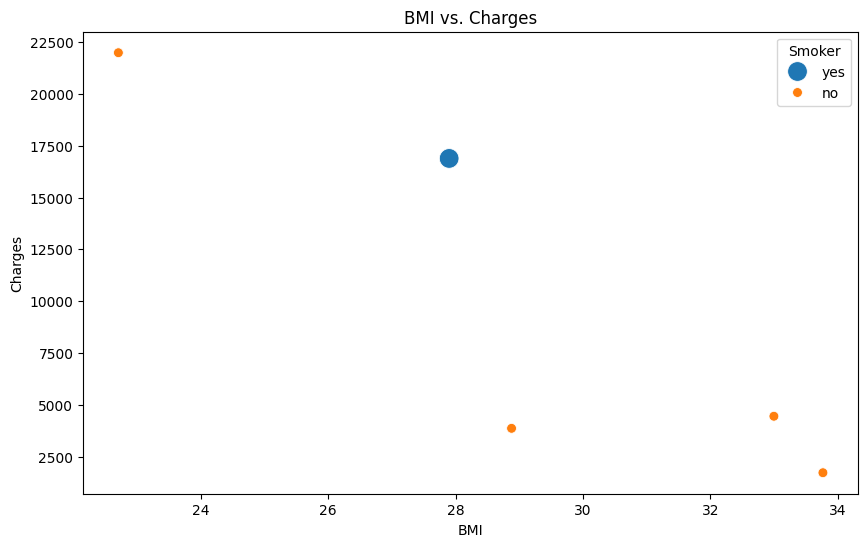

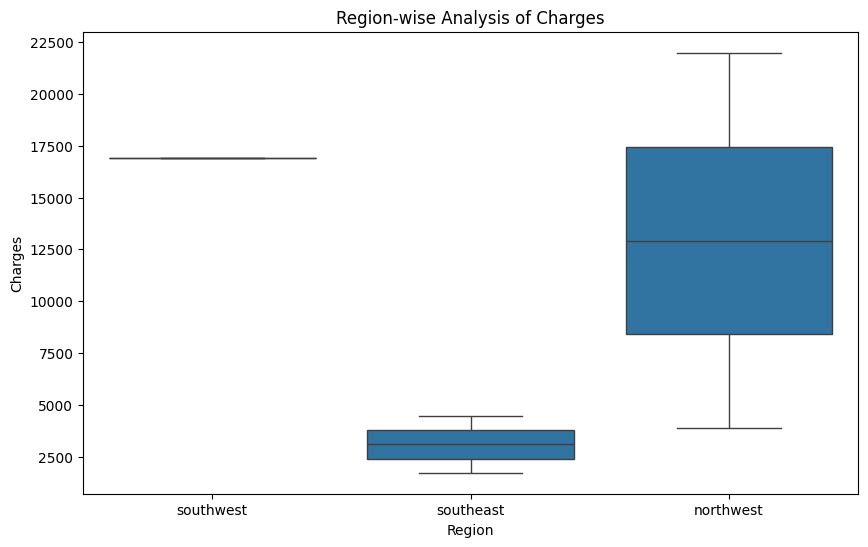

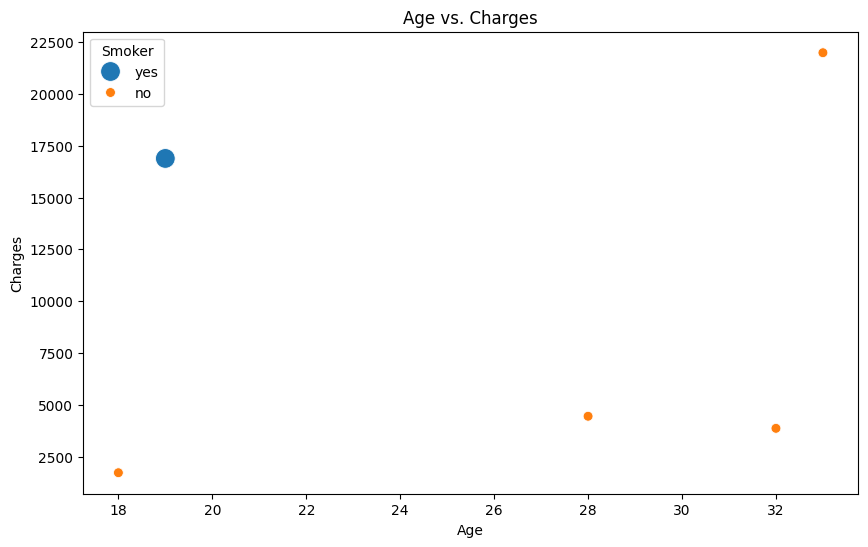

In [ ]:
df = pd.DataFrame(data)
#  Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', size='smoker', sizes=(50, 200))
plt.title('BMI vs. Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()
#  Region-wise Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region-wise Analysis of Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()
# Visualization 6: Age vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='smoker', size='smoker', sizes=(50, 200))
plt.title('Age vs. Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(title='Smoker')
plt.show()


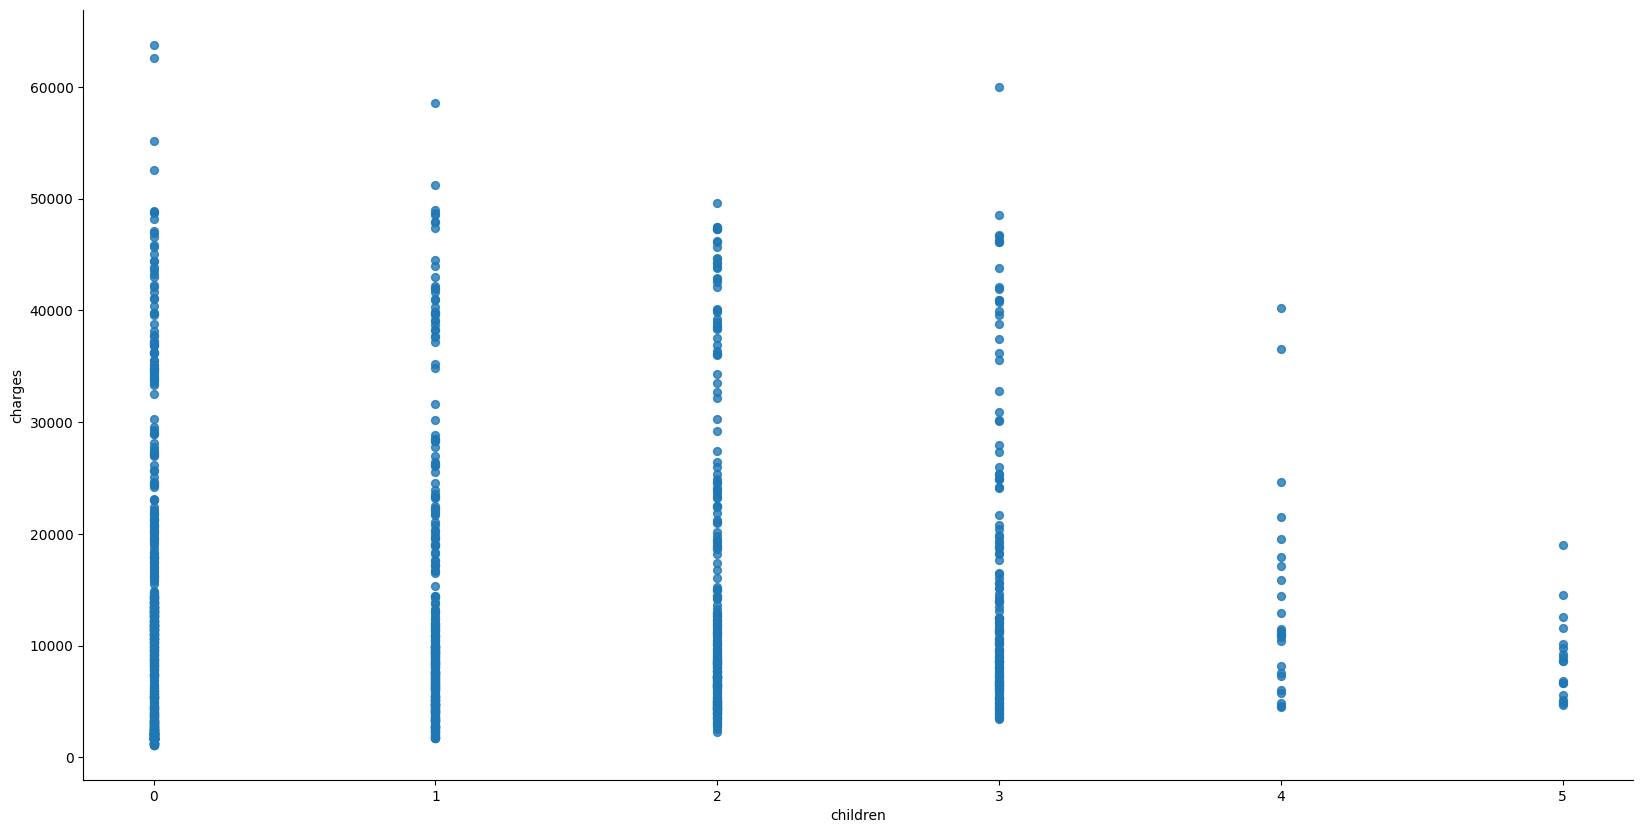

In [ ]:
# @title children vs charges

from matplotlib import pyplot as plt
insur_data.plot(kind='scatter', x='children', y='charges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
plt.suptitle('Summary of Data', fontsize=16)
print("Summary of Data:")
print(df.describe())

plt.show()

Summary of Data:
             age        bmi  children       charges
count   5.000000   5.000000   5.00000      5.000000
mean   26.000000  29.251000   0.80000   9782.252822
std     7.106335   4.452228   1.30384   9051.009158
min    18.000000  22.705000   0.00000   1725.552300
25%    19.000000  27.900000   0.00000   3866.855200
50%    28.000000  28.880000   0.00000   4449.462000
75%    32.000000  33.000000   1.00000  16884.924000
max    33.000000  33.770000   3.00000  21984.470610


<Figure size 2000x1000 with 0 Axes>

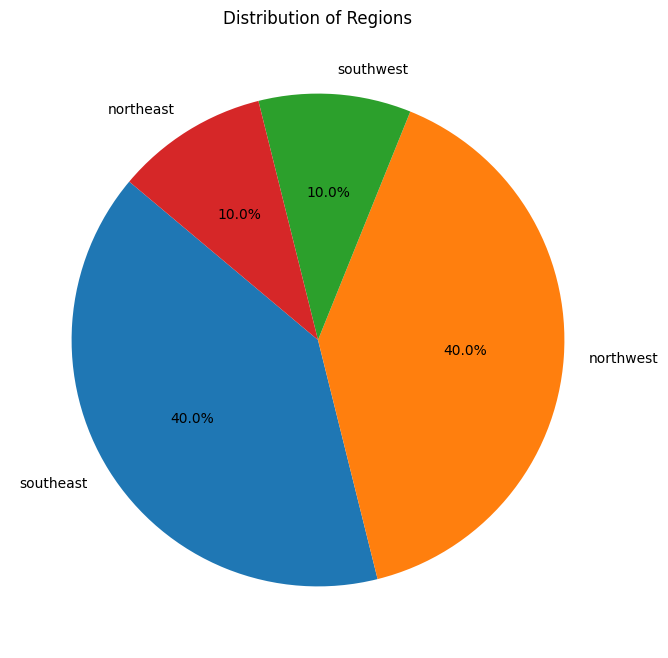

In [ ]:
df = pd.DataFrame(data)
region_counts = df['region'].value_counts()    # Count the occurrences of each region
plt.figure(figsize=(8, 8))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Regions')
plt.show()


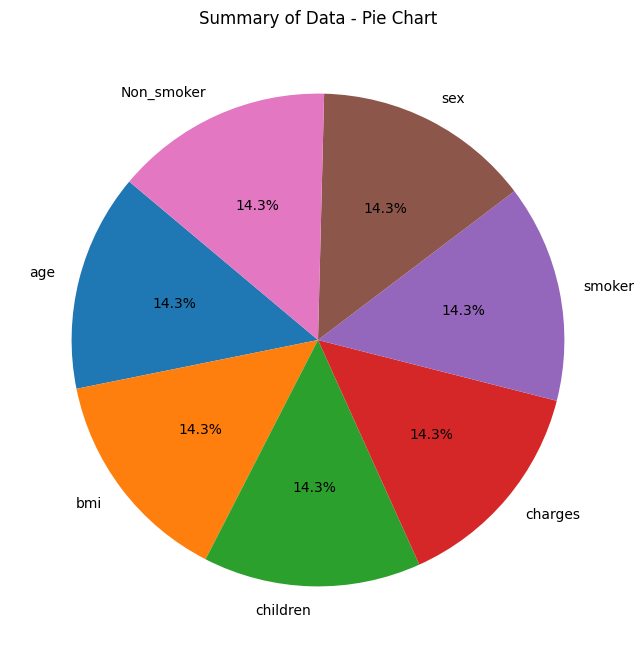

In [ ]:


# @title Summary of Data
data = {
    "age": [5],
    "bmi": [5],
    "children": [5],
    "charges": [5],
    "smoker":  [5],
    "sex": [5],
    "Non_smoker":[5]
}
index = ['count']
summary_df = pd.DataFrame(data, index=index)
summary_df.loc['count'] = [5, 5, 5,5,5,5,5]
plt.figure(figsize=(8, 8))
plt.pie(summary_df.iloc[0], labels=summary_df.columns, autopct='%1.1f%%', startangle=140)
plt.title('Summary of Data - Pie Chart')
plt.show()
